In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

# Uniform experiment

In [112]:
def uniform_experiment(t_in_R, n_studies):
    
    u = np.random.uniform(0, 1, n_studies)
    w = np.random.uniform(0, 1, n_studies)
    v = t_in_R * np.random.binomial(1, u) + (1-t_in_R) * np.random.binomial(1, w)

    eps = 1e-50
    test_stat = sum(np.log(v*u + (1-v)*(1-u) + eps) - np.log(v*w + (1-v)*(1-w) + eps))
    prediction = int(test_stat > 0)

    return prediction
    
iter_values = [1, 2, 3, 5, 10, 20, 50, 100]
false_positives = []
false_negatives = []
iterations = 10_000
for n_studies in iter_values:
    positive_predictions = []
    for _ in range(iterations):
        positive_predictions.append(uniform_experiment(True, n_studies))
    false_positives.append(1-np.mean(positive_predictions))
    
    negative_predictions = []
    for _ in range(iterations):
        negative_predictions.append(uniform_experiment(False, n_studies))
    false_negatives.append(np.mean(negative_predictions))

results_filename = 'uniform_results.csv'
results = {"FPR" : false_positives, "FNR" : false_negatives}
results_df = pd.DataFrame( results )
results_df.to_csv( results_filename, index=False )

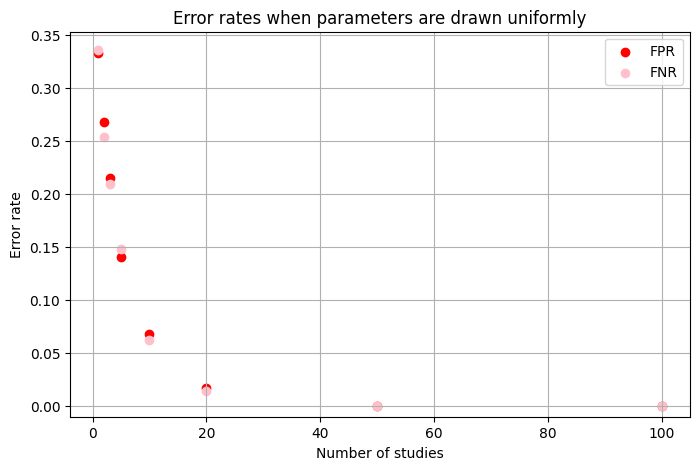

In [132]:
iter_values = [1, 2, 3, 5, 10, 20, 50, 100]

results_filename = 'uniform_results.csv'
results_df = pd.read_csv( results_filename )

false_positives = results_df["FPR"]
false_negatives = results_df["FNR"]

plt.subplots( 1, 1, figsize=( 8, 5 ) )
plt.scatter(x=iter_values, y=false_positives, color="red", label="FPR")
plt.scatter(x=iter_values, y=false_negatives, color="pink", label="FNR")
plt.grid(True)
plt.ylim(bottom=-0.01)
plt.xlabel("Number of studies")
plt.ylabel("Error rate")
plt.legend(loc="best")
plt.title("Error rates when parameters are drawn uniformly")
plt.savefig("uniform_plot")

In [138]:
results_filename = 'uniform_results.csv'
results_df = pd.read_csv( results_filename )
print([1, 2, 3, 5, 10, 20, 50, 100])
print()
print(results_df)

[1, 2, 3, 5, 10, 20, 50, 100]

      FPR     FNR
0  0.3323  0.3359
1  0.2680  0.2537
2  0.2151  0.2095
3  0.1405  0.1483
4  0.0675  0.0621
5  0.0166  0.0141
6  0.0003  0.0002
7  0.0000  0.0000


# Gaussian experiment

In [160]:
def gaussian_experiment(t_in_R, n_studies, scale):

    u = np.random.uniform(0, 1, n_studies)
    noise = np.random.normal(0, scale, n_studies)
    w = np.clip(u + noise, a_min=0, a_max=1)
    v = t_in_R * np.random.binomial(1, u) + (1-t_in_R) * np.random.binomial(1, w)

    eps = 1e-50
    test_stat = sum(np.log(v*u + (1-v)*(1-u) + eps) - np.log(v*w + (1-v)*(1-w) + eps))
    prediction = int(test_stat > 0)

    return prediction

n_iter_values = [1, 10, 50, 100, 200, 500]
scale_iter_values = [0.1, 0.01, 0.001]
false_positives = defaultdict(list)
false_negatives = defaultdict(list)
iterations = 10_000
for n_studies in n_iter_values:
    for scale in scale_iter_values:
        positive_predictions = []
        for _ in range(iterations):
            positive_predictions.append(gaussian_experiment(True, n_studies, scale))
        false_positives[str(scale) + " FPR"].append(1-np.mean(positive_predictions))

        negative_predictions = []
        for _ in range(iterations):
            negative_predictions.append(gaussian_experiment(False, n_studies, scale))
        false_negatives[str(scale) + " FNR"].append(np.mean(negative_predictions))

results_filename = 'gaussian_results.csv'
false_positives.update(false_negatives)
results = false_positives
results_df = pd.DataFrame( results )
results_df.to_csv( results_filename, index=False )

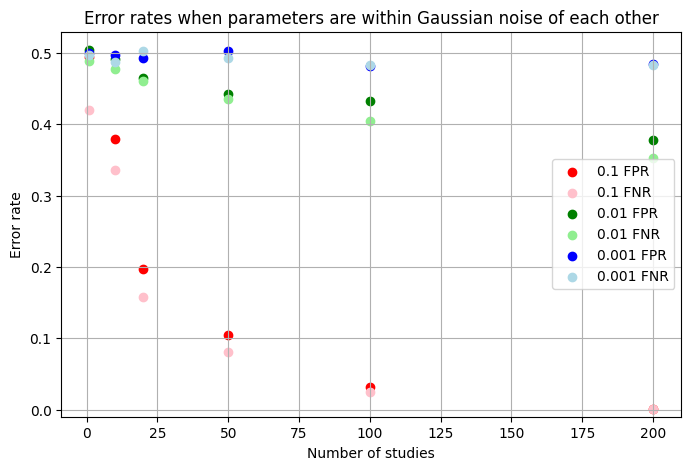

In [161]:
n_iter_values = [1, 10, 20, 50, 100, 200]
scale_iter_values = [0.1, 0.01, 0.001]

results_filename = 'gaussian_results.csv'
results_df = pd.read_csv( results_filename )

plt.subplots( 1, 1, figsize=( 8, 5 ) )
colors = ["red", "pink", "green", "lightgreen", "blue", "lightblue"]
color_i = 0
for scale in scale_iter_values:
    FPR_label = str(scale) + " FPR"
    FNR_label = str(scale) + " FNR"
    plt.scatter(x=n_iter_values, y=results_df[FPR_label], label=FPR_label, color=colors[color_i])
    plt.scatter(x=n_iter_values, y=results_df[FNR_label], label=FNR_label, color=colors[color_i+1])
    color_i += 2
plt.grid(True)
plt.ylim(bottom=-0.01)
plt.xlabel("Number of studies")
plt.ylabel("Error rate")
plt.legend(loc="best")
plt.title("Error rates when parameters are within Gaussian noise of each other")
plt.savefig("gaussian_plot")
plt.show()

In [169]:
results_filename = 'gaussian_results.csv'
results_df = pd.read_csv( results_filename )
print([1, 10, 20, 50, 100, 200])
print()
print(results_df)

[1, 10, 20, 50, 100, 200]

   0.1 FPR  0.01 FPR  0.001 FPR  0.1 FNR  0.01 FNR  0.001 FNR
0   0.4941    0.5045     0.4998   0.4200    0.4887     0.4969
1   0.3799    0.4920     0.4973   0.3359    0.4769     0.4866
2   0.1975    0.4652     0.4927   0.1578    0.4600     0.5029
3   0.1052    0.4429     0.5023   0.0801    0.4351     0.4933
4   0.0316    0.4323     0.4813   0.0251    0.4047     0.4837
5   0.0014    0.3777     0.4846   0.0010    0.3521     0.4837


# Exponential experiment

In [163]:
def exponential_experiment(t_in_R, n_studies, scale):

    u = np.clip(np.random.exponential(scale=scale, size=n_studies), a_min=0, a_max=1)
    w = np.full(n_studies, scale)
    v = t_in_R * np.random.binomial(1, u) + (1-t_in_R) * np.random.binomial(1, w)

    eps = 1e-50
    test_stat = sum(np.log(v*u + (1-v)*(1-u) + eps) - np.log(v*w + (1-v)*(1-w) + eps))
    prediction = int(test_stat > 0)

    return prediction

n_iter_values = [1, 10, 20, 50, 100, 200]
scale_iter_values = [0.01, 0.005, 0.001]
false_positives = defaultdict(list)
false_negatives = defaultdict(list)
iterations = 100_000
for n_studies in n_iter_values:
    for scale in scale_iter_values:
        positive_predictions = []
        for _ in range(iterations):
            positive_predictions.append(exponential_experiment(True, n_studies, scale))
        false_positives[str(scale) + " FPR"].append(1-np.mean(positive_predictions))

        negative_predictions = []
        for _ in range(iterations):
            negative_predictions.append(exponential_experiment(False, n_studies, scale))
        false_negatives[str(scale) + " FNR"].append(np.mean(negative_predictions))

results_filename = 'exponential_results.csv'
false_positives.update(false_negatives)
results = false_positives
results_df = pd.DataFrame( results )
results_df.to_csv( results_filename, index=False )

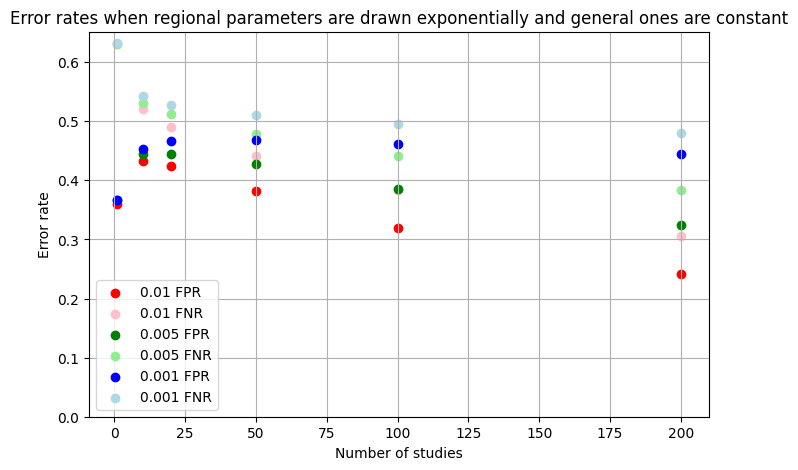

In [164]:
n_iter_values = [1, 10, 20, 50, 100, 200]
scale_iter_values = [0.01, 0.005, 0.001]

results_filename = 'exponential_results.csv'
results_df = pd.read_csv( results_filename )

plt.subplots( 1, 1, figsize=( 8, 5 ) )
colors = ["red", "pink", "green", "lightgreen", "blue", "lightblue"]
color_i = 0
for scale in scale_iter_values:
    FPR_label = str(scale) + " FPR"
    FNR_label = str(scale) + " FNR"
    plt.scatter(x=n_iter_values, y=results_df[FPR_label], label=FPR_label, color=colors[color_i])
    plt.scatter(x=n_iter_values, y=results_df[FNR_label], label=FNR_label, color=colors[color_i+1])
    color_i += 2
plt.grid(True)
plt.ylim(bottom=0)
plt.xlabel("Number of studies")
plt.ylabel("Error rate")
plt.legend(loc="best")
plt.title("Error rates when regional parameters are drawn exponentially and general ones are constant")
plt.savefig("exponential_plot")
plt.show()

In [168]:
results_filename = 'exponential_results.csv'
results_df = pd.read_csv( results_filename )
print([1, 10, 20, 50, 100, 200])
print()
print(results_df)

[1, 10, 20, 50, 100, 200]

   0.01 FPR  0.005 FPR  0.001 FPR  0.01 FNR  0.005 FNR  0.001 FNR
0   0.35949    0.36626    0.36655   0.63039    0.63018    0.63189
1   0.43276    0.44513    0.45279   0.52007    0.53162    0.54331
2   0.42410    0.44385    0.46718   0.49042    0.51253    0.52784
3   0.38147    0.42723    0.46829   0.44061    0.47773    0.50981
4   0.31944    0.38580    0.46126   0.38442    0.44187    0.49495
5   0.24185    0.32388    0.44452   0.30610    0.38395    0.47931
